# Foundations of Data Mining: Assignment 4

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## Backpropagation (3 points)

Figure 1 illustrates a simple neural network model.

![Figure 1](images/assignment/small-net.png)

It has single input $x$, two layers with one neuron each. The activation function of both layers is ReLU. 

The parameters $w_0$ and $w_1$ (no biases) are initialized to the following values $w_0 = 1$ and $w_1 = 2$. Implement a single update step of the gradient descent algorithm by hand. Run the update state for the following two data points:

* $(1, 2)$ 
* $(2, 3)$

The goal is to model the relationship between two continuous variables. The learning rate is set to $0.1$

Provide the solution in the following format:

- A choice for a loss function 
- Compute graph for training the neural network
- Partial derivative expression for each of the parameters in the model
- The update expression for each of the parameters for each of the data-points
- The final value of both parameters after the single step in the gradient descent algorithm


## Solution

The loss function is the mean squared error. The compute graph for the forward pass is shown in figure 2.

![Figure 2](gradient-compute-graph.png)


In order to compute $\frac{\partial{\hat{L}}}{\partial{w_0}}$ and $\frac{\partial{\hat{L}}}{\partial{w_1}}$ we will apply the chain rule, therefore let the input sample be $(\hat{x}, \hat{y})$, and compute:

\begin{align*}
\hat{L}=\frac{1}{2}(\hat{y}-y_2)^2 &\Longrightarrow \frac{\partial{\hat{L}}}{\partial{y_2}} = y_2-\hat{y} \\
y_2=\max(0, z_1) &\Longrightarrow \frac{\partial{y_2}}{\partial{z_1}} = \mathbb{1}\{z_1>0\} \\
z_1=y_0\cdot w_1 &\Longrightarrow \frac{\partial{z_1}}{\partial{w_1}} = y_0 \\
z_1=y_0\cdot w_1 &\Longrightarrow \frac{\partial{z_1}}{\partial{y_0}} = w_1 \\
y_0=\max(0, z_0) &\Longrightarrow \frac{\partial{y_0}}{\partial{z_0}} = \mathbb{1}\{z_0>0\} \\
z_0=\hat{x}\cdot w_0 &\Longrightarrow \frac{\partial{z_0}}{\partial{w_0}} = \hat{x}
\end{align*}

Thus the gradient is:

\begin{align*}
\frac{\partial{\hat{L}}}{\partial{w_1}}
&=\frac{\partial{\hat{L}}}{\partial{y_2}}
\cdot\frac{\partial{y_2}}{\partial{z_1}}
\cdot\frac{\partial{z_1}}{\partial{w_1}} \\
&=(y_2-\hat{y})\cdot\mathbb{1}\{z_1>0\}\cdot y_0 \\
\frac{\partial{\hat{L}}}{\partial{w_0}}
&=\frac{\partial{\hat{L}}}{\partial{y_2}}
\cdot\frac{\partial{y_2}}{\partial{z_1}}
\cdot\frac{\partial{z_1}}{\partial{y_0}}
\cdot\frac{\partial{y_0}}{\partial{z_0}}
\cdot\frac{\partial{z_0}}{\partial{w_0}} \\
&=(y_2-\hat{y})\cdot\mathbb{1}\{z_1>0\}\cdot w_0\cdot \mathbb{1}\{z_0>0\}\cdot\hat{x}
\end{align*}

And the update rules are:

\begin{align*}
w_1 & := w_1 - \eta\cdot\frac{\partial{\hat{L}}}{\partial{w_1}} \\
w_0 & := w_0 - \eta\cdot\frac{\partial{\hat{L}}}{\partial{w_0}}
\end{align*}

When we perform the forward pass with the first sample $\hat{x}=1$, $\hat{y}=2$ we find that:

$$
z_0=1, y_0=1, z_1=2, y_2=2, \hat{L}=0
$$

Since $y_2=\hat{y}=2$, we have that $\frac{\partial{\hat{L}}}{\partial{y_2}}=0$, thus the weights are not updated in the backward pass. Next, we perform the forward pass with the second example $\hat{x}=2$, $\hat{y}=3$:

$$
z_0=2, y_0=2, z_1=4, y_2=4, \hat{L}=\frac{1}{2}
$$

Thus the gradient is:

\begin{align*}
\frac{\partial{\hat{L}}}{\partial{w_1}}
&=1 \cdot 1 \cdot 2 = 2\\
\frac{\partial{\hat{L}}}{\partial{w_0}}
&=1 \cdot 1 \cdot 2 \cdot 1 \cdot 2 = 4
\end{align*}

Given that the learning rate is $\eta=0.1$, the new weights are:

\begin{align*}
w_1 & := 2 - 0.1\cdot 2 = 1.8 \\
w_0 & := 1 - 0.1\cdot 4 = 0.6
\end{align*}


## Training Deep Models (3 points)

The model in the example code below performs poorly as its depth increases. Train this model on the MNIST digit detection task. 

Examine its training performance by gradually increasing its depth:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Modify the model such that you improve its performance when its depth increases. Train the new model again for the different depths:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Submit an explanation for the limitation of the original model. Explain your modification. 
Submit your code and 6 plots (can be overlaid) for the training performance of both models with different depths. 



In [3]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


Depth: 1 - Cross-entropy: 0.256 - Accuracy: 0.929
Depth: 2 - Cross-entropy: 0.206 - Accuracy: 0.941
Depth: 3 - Cross-entropy: 0.180 - Accuracy: 0.946


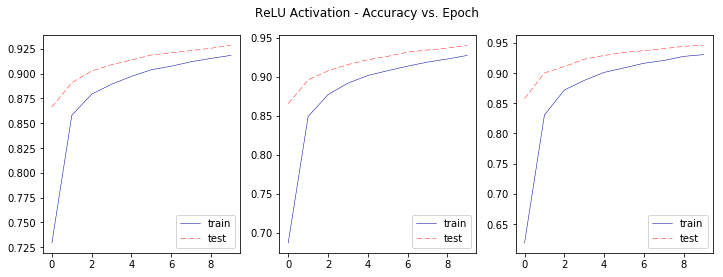

Depth: 1 - Cross-entropy: 0.467 - Accuracy: 0.883
Depth: 2 - Cross-entropy: 0.870 - Accuracy: 0.791
Depth: 3 - Cross-entropy: 2.229 - Accuracy: 0.149


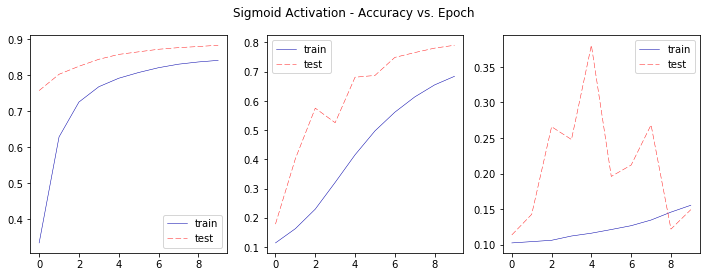

In [21]:
from keras.initializers import RandomNormal

def train_net(number_hidden_layers, activation,
              batch_size=128, nb_classes=10, nb_epoch=10):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation=activation))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1

    model.add(Dense(10))
    model.add(Activation('softmax'))
    #model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=0, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    
    return score, history


def plot_history(history):
    plt.plot(history.history['acc']);
    plt.plot(history.history['val_acc']);
    plt.legend(['train', 'test'], loc='best');


def run_benchmark(activation):
    for i, depth in enumerate([1, 2, 3]):
        (crossent, acc), history = train_net(depth, activation)
        print('Depth: %d - Cross-entropy: %.3f - Accuracy: %.3f' % (
            depth, crossent, acc
        ))

        plt.subplot(1, 3, i + 1);
        plot_history(history)


plt.figure(figsize=(12, 4))
plt.suptitle('ReLU Activation - Accuracy vs. Epoch');
run_benchmark(activation='relu')
plt.show();

plt.figure(figsize=(12, 4))
plt.suptitle('Sigmoid Activation - Accuracy vs. Epoch');
run_benchmark(activation='sigmoid')
plt.show();

The only modification required to achieve good performance is to use the ReLU activation instead of the sigmoid. The reason for this is that the sigmoid activation is vulnerable to the vanishing gradient problem. This problem is especially evident when the network has many layers; in fact, the difference between ReLU and sigmoid with one hidden layer is rather small, compared to bigger networks.

## Convolutional Neural Networks for Filtering (2 points)

Convolutional neural networks are well suited for analyzing images. They can be used to apply various image filtering operations. 

The goal of this exercise is to design a CNN model that applies 2 filters to its input images. The input images are 128x128 RGB color images, encoded as 128x128x3 tensor with floating point value normalized between 0 and 1. The RGB format is such that the pixels address by: [:, :, 0] encode the red pixels of the image, the pixels addressed by [:, :, 1] define the green pixels and pixels addressed by [:, :, 2] define the blue pixels. 

Design a convolutional neural network that will: 
1. Apply the sepia filter to the image
2. Apply Gaussian smoothing to the image

Use the specification of the sepia and the Gaussian filter below. 

You answer should contain:
    - The definition of the architecture of the CNN
        - Number of layers
        - Number of filters per layer
        - Shape of the filter per layer
    - Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter
    - The dimensions of the output image when a 5x5 Gaussian smoothing is applied


The sepia effect gives warmth and a feel of vintage to photographs. The sepia filter is defined as:

$$
R_o = (R_i * .393) + (G_i *.769) + (B_i * .189)
$$
$$
G_o = (R_i * .349) + (G_i *.686) + (B_i * .168)
$$
$$
B_o = (R_i * .272) + (G_i *.534) + (B_i * .131)
$$

Gaussian blurring is an effect that reduces the noise and details in an image. 
Gaussian smoothing filter:
$$G(x, y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

- A discretized version of the filter is given by the following table:

$$\begin{bmatrix}
    1       & 4 & 7 & 4 & 1 \\
    4       & 16 & 26 & 16 & 4 \\
    7       & 26 & 41 & 26 & 7 \\
    4       & 16 & 26 & 16 & 4 \\
    1       & 4 & 7 & 4 & 1 \\
\end{bmatrix}$$

- To normalize the filter response, each value should divided by $273$. This is a truncated discretized Gaussian filter with a $\sigma$ of 1.


## Solution

![CNN architecture](CNN_for_Filtering.png)

The layers of this CNN is as the image above.

The sepia effect is achieved by a $1\times1\times3$ convolution with $3$ neurons. The neurons compute the $RGB$ values respectively using the fomula above for the intermediate images.

The Gaussian blurring is achieved by a $5\times5\times3$ convolution with $3$ neurons. The neurons compute the blurring for $RGB$ channels respectively.

Note that the output image is $124\times124$ color image, which means the convolution for Gaussian blurring does not apply padding and the stride is $1$.

Let $G$ denote the Gaussian blurring matrix, i.e.:
$$G=\frac{1}{273}\begin{bmatrix}
    1       & 4 & 7 & 4 & 1 \\
    4       & 16 & 26 & 16 & 4 \\
    7       & 26 & 41 & 26 & 7 \\
    4       & 16 & 26 & 16 & 4 \\
    1       & 4 & 7 & 4 & 1 \\
\end{bmatrix}$$

The pixel value of $RGB$ channels is computed as the following:

Let $P(c, i, j)$ denote the intensity of the pixel at coordinates $(i,j)$ with respect to the channel $c$ (either red, green or blue), and $P^\prime$ be the blurred image. Then:

$$
P^\prime(c,i,j)=\sum_{k=1}^{5}\sum_{l=1}^{5}P(c,i+k-1,j+l-1)G(k,l)
$$

Therefore, when dealing with one color channel, the other two channels are ignored, i.e., the weights for the other two values are zeros, and the three neurons apply the same transformation to the three channels of the image, separately.

To conclude:

* The number of layers is 2;
* The numer of filters of sepia effect layer is 3; the numer of filters of Gaussian blurring layer is 3;
* sepia effect layer(1\*1\*3); Gaussian blurring layer(5\*5\*3);
* The output image is of size 124\*124.

## Model Design (2 Points)

Various decisions need to be made in a modeling process to address specific properties of the data and the modeling goal. In this task, you are given a description of a data structure and a goal for which you need to design a model. 

Produce a figure depicting your model. Briefly explain the figure and justify all decisions made in the modeling process. In detail, describe at least: 

- Input data format
- Number of layers
- Type of layers (Dense, Recurrent, Convolutional - 1D, 2D, 3D)
- Regularization
- Model output
- Loss function

The training and execution procedures for the model may differ, so you can use different descriptions for both. 

*Data and goal description:*

The goal of this task is to generate captions for short video clips. 

The video data is structured as sequences of color images. The model needs to be able to process a number of consecutive images that form a short video clip. The training data consists of video clips (few seconds) and a short caption (5-10 words). 

For simplicity, the accuracy of the model is evaluated on the exact prediction of the caption. In other words, the model needs to produce correctly the specific words in a specific order for each video. 

## Solution

### System Structure

![Figure 3](CNN+RNN.png)


Inspired by [S. Venugopalan et al.](https://arxiv.org/pdf/1412.4729.pdf),
[Jeff Donahue et al.](https://arxiv.org/pdf/1411.4389.pdf) and 
the [lecture note](./NN8 - Recurrent Networks.ipynb),
the architecture of the model is shown as the above figure, the convolution
and LSTM stacks unrolled over time. Based on experiments by Donahue
et al. (2014), it's suggested two LSTM layers
are better than four and a single layer for image to
text tasks.

### Input data format & output
During execution, the input of the system is a sequence of image frames from a video,
the output is a sequence of words, i.e, the caption of the video, denote as 
$[y_1, y_2, \cdots, y_m]$, where each $y_i$ is encoded with a bag-of-words, one-hot
encoding.

In order to generalize our model, it must be trained with broad range of vocabulary.
$N$ is the size of the vocabulary.

### Training
#### Convolutional layer training
This layer is pre-trained separately. The output of this layer is
the vertorized representation of the image frame, which is then
fed to the 1st LSTM layer.

Using large number(millions) of static images and the corresponding ***image captions***,
the convolutional layer is able to provide robust and solid vector representation
of the image objects.

##### Image size
For simplicity, let's assume that each video frame is a $128\times128$ color image.
Therefore, the images used to train the CNN are also $128\times128$ color images.
Those static images describe daily entities such as animals, people, celebrities and tools; 
Eech image is label with one word, which is then converted to one-hot encoded vectors(1-N).

##### CNN architecture

![Mnist model](images/mnist-conv-net.png)

For simplicity, the image is borrowed from one of the lecture notes.
Obviously, the $10\times$ softmax should be modified to $N\times$ softmax.

The goal of pre-training is to make the CNN yield better vector representation of video frames. After trained with millions of images, the CNN should do a good job at image
object recognition.

#### LSTM training
The output of the convolutional layer is fed to the LSTM layer.
Since our CNN is well trained already, the *Fully Connected* layer
and *$N\times$* Fully-Connected layer are removed. Therefore, only the flattened
vector representation of one image frame is fed into the
1st LSTM layer. So the convolutional layer can be seen as
a feature extraction layer.

The output of the 1st LSTM layer, the hidden state $h_t$ is fed into
the 2nd LSTM layer as its input.

After going through all image frames, the 2nd LSTM layer starts to yield the caption.
Each time, the state of the LSTM is updated by combining not only the current
state $\theta$, but also the last word yielded. The 2nd LSTM layer generates 
a probability distribution over the entire
vocabulary; a softmax function is applied, the word with the largest
probability is yielded.

Therefore the loss function, log-likelihood can be written
as:
$$\theta^*=argmax_{\theta}\sum_{t=1}^{m}\log p(y_t|h_{t-1},y_{t-1};\theta)$$
The output is denoted as $[y_1, y_2, \cdots, y_m]$.

### Conclusion
* Number of layers: 4 (convolutional layer taken as one layer)
* Model output: the caption words of a video clip

## MNIST Calculator (5 points)

During the lectures you have seen a CNN model that can be successfully trained to classify the MNIST images. You have also seen how a RNN model that can be trained to implement addition of two numbers. 

Using the KERAS (or TensorFlow) library, design and train a model that can learn how to add numbers directly from the MNIST image data. More specifically, the model should input a sequence of a set of images and produces a cumulative sum of the numbers represented by the digits in the images.

For example:

Input 1: ![294](images/294.png)

Input 2: ![61](images/61.png)

Output: 355




In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.engine.training import _slice_arrays
from keras.layers import (Activation, TimeDistributed,
                          Dense, RepeatVector, recurrent)
import numpy as np
from six.moves import range
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


DIGITS = 5
MAXLEN = DIGITS + 1 + DIGITS
chars = '0123456789+ '


class CharacterTable(object):
    def __init__(self, chars, maxlen):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))
        self.maxlen = maxlen

    def encode(self, C, maxlen=None):
        maxlen = maxlen if maxlen else self.maxlen
        X = np.zeros((maxlen, len(self.chars)))
        for i, c in enumerate(C):
            X[i, self.char_indices[c]] = 1
        return X

    def decode(self, X, calc_argmax=True):
        if calc_argmax:
            X = X.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in X)


class MNISTAdditionGenerator:

    def __init__(self, invert):
        self.ctable = CharacterTable(chars, MAXLEN)
        self.invert = invert
        self.load_mnist()
        self.plus_encoding = 255 * np.random.random(self.mnist_shape)
        self.blank_encoding = 255 * np.random.random(self.mnist_shape)

    def load_mnist(self):
        img_rows = img_cols = 28

        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        if K.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        self.mnist_shape = input_shape
        self.mnist_x = x_train #np.concatenate([x_train, x_test], axis=0)
        self.mnist_y = y_train #np.concatenate([y_train, y_test], axis=0)

    def random_number(self):
        digits = [
            np.random.choice(list('0123456789'))
            for i in range(np.random.randint(1, DIGITS + 1))
        ]
        return int(''.join(digits))
        
    def generate_question(self):
        a, b = self.random_number(), self.random_number()

        query = '{}+{}'.format(a, b)
        ans = str(a + b)

        if self.invert:
            query = query[::-1]
            ans = ans[::-1]

        query += ' ' * (MAXLEN - len(query))
        ans += ' ' * (DIGITS + 1 - len(ans))

        return query, ans

    def encode_question(self, question, out_arr=None, out_pos=None):
        if out_arr is None:
            out_pos = 0
            out_arr = np.zeros([1, MAXLEN] + list(self.mnist_shape),
                               dtype=self.mnist_x.dtype)

        for j, char in enumerate(question):
            if char in '0123456789':
                image = None
                while image is None:
                    k = np.random.choice(self.mnist_y.shape[0])
                    if self.mnist_y[k] == int(char):
                        image = self.mnist_x[k]
            elif char == '+':
                image = self.plus_encoding
            else:
                image = self.blank_encoding

            out_arr[out_pos, j] = image
        return out_arr

    def generate_training_set(self, count, train_test_split=0.9):
        X = np.zeros([count, MAXLEN] + list(self.mnist_shape),
                     dtype=self.mnist_x.dtype)
        y = np.zeros((count, DIGITS + 1, len(chars)), dtype=np.bool)

        for i in range(count):
            question, answer = self.generate_question()
            self.encode_question(question, X, i)
            y[i] = self.ctable.encode(answer, maxlen=DIGITS + 1)

        # Shuffle (X, y) in unison as the later parts of X
        #will almost all be larger digits
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        X, y =  X[indices], y[indices]

        split_at = int(X.shape[0] * train_test_split)
        (X_train, X_val) = (_slice_arrays(X, 0, split_at),
                            _slice_arrays(X, split_at))
        (y_train, y_val) = (y[:split_at], y[split_at:])

        return (X_train, y_train), (X_val, y_val)


def build_model(input_shape, rnn_class, hidden_rnn_layers, hidden_rnn_size):
    model = Sequential()

    # the convolutional part is applied to each digit separately
    model.add(TimeDistributed(Conv2D(32, (5, 5), activation='relu', strides=3),
                              input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(Dropout(0.2))

    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', strides=1)))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(Dropout(0.5))

    model.add(TimeDistributed(Flatten()))
    model.add(TimeDistributed(Dense(256, activation='relu')))

    # the recurrent part is applied to the whole sequence
    model.add(rnn_class(hidden_rnn_size))
    model.add(RepeatVector(DIGITS + 1))
    for _ in range(hidden_rnn_layers):
        model.add(rnn_class(hidden_rnn_size, return_sequences=True))

    # For each of step of the output sequence,
    # decide which character should be chosen
    model.add(TimeDistributed(Dense(len(chars))))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

Using TensorFlow backend.


In [2]:
ts = MNISTAdditionGenerator(invert=False)
(X_train, y_train), (X_val, y_val) = ts.generate_training_set(500000)

model = build_model(X_train.shape[1:], recurrent.LSTM,
                    hidden_rnn_layers=2, hidden_rnn_size=256)

for iteration in range(1, 4):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              batch_size=512, epochs=3, verbose=2)

    for i in range(10):
        question, answer = ts.generate_question()
        qX = ts.encode_question(question)
        preds = model.predict_classes(qX, verbose=0)
        guess = ts.ctable.decode(preds[0], calc_argmax=False)

        print('%s = %s (correct %s)' % (question, guess, answer))


--------------------------------------------------
Iteration 1
Train on 450000 samples, validate on 50000 samples
Epoch 1/3
192s - loss: 1.5536 - acc: 0.4309 - val_loss: 1.4890 - val_acc: 0.4391
Epoch 2/3
186s - loss: 1.4719 - acc: 0.4420 - val_loss: 1.4291 - val_acc: 0.4535
Epoch 3/3
186s - loss: 1.2457 - acc: 0.5272 - val_loss: 0.9977 - val_acc: 0.6230
8921+10674  = 23734  (correct 19595 )
632+14      = 650    (correct 646   )
2296+81     = 2347   (correct 2377  )
668+7       = 674    (correct 675   )
5902+7178   = 14374  (correct 13080 )
4+6         = 11     (correct 10    )
412+966     = 1707   (correct 1378  )
9800+5      = 9827   (correct 9805  )
5+92        = 97     (correct 97    )
31986+88493 = 113777 (correct 120479)

--------------------------------------------------
Iteration 2
Train on 450000 samples, validate on 50000 samples
Epoch 1/3
185s - loss: 0.9057 - acc: 0.6713 - val_loss: 0.6025 - val_acc: 0.7935
Epoch 2/3
186s - loss: 0.6312 - acc: 0.7958 - val_loss: 0.4299 - v

Question


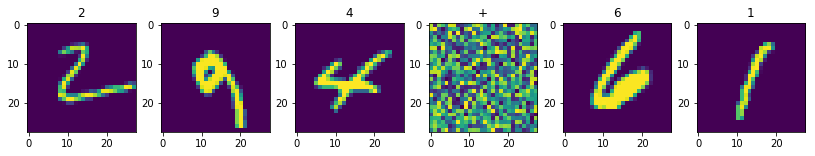

Answer: 355   


In [20]:
q = '294+61'
qX = ts.encode_question(q + '    ')

print('Question')
plt.figure(figsize=(14, 2))
for i, (img, char) in enumerate(zip(qX[0][:len(q)], q)):
    plt.subplot(1, len(q), i + 1)
    plt.title(char)
    plt.imshow(img[:, :, 0])
plt.show()

preds = model.predict_classes(qX, verbose=0)
guess = ts.ctable.decode(preds[0], calc_argmax=False)
print('Answer:', guess)